# Module 1: Bash, file formats and quality control (part 2)

Welcome to the notebook! There are some very important instructions for you to follow:

1.) Click on File on the top left corner and select save a copy in drive

**Your changes will not be saved if you do not do this step**

2.) Click on the name of the workbook in the top left corner and replace "Copy of" with your full name

**You will be submitting the downloaded notebook file as your proof of completion for this module**


Please type:
```
print("Yes, I have done step 1")
print("Yes, I have done step 2")

```
into the code block below, then run by clicking the "triangle"/"Play" icon on that block



In [ ]:
#this block will be checked


# Installing Conda
Conda is a versatile software management tool. Conda is an open source system of managing tools and libraries. More info on the library used to install conda on Google Colab is at this [website](https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/)

Note - your runtime will refresh and reconnect after running this. It will say runtime crashed, this seems normal, wait for the session to reconnect after this.


You can check out this repo for how this tool works:
https://github.com/conda-incubator/condacolab



In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
#Add any conda or software installs here

In [ ]:
!conda init

In [ ]:
!conda install -c bioconda fastqc

# Retrieve data files for this practical
Colab launches a virtual computing environment each time you start a notebook. You will need to download the data you need in the steps to follow using the code blocks below

In [ ]:
# Add any data download links here

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR209/005/ERR2093245/ERR2093245_1.fastq.gz

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR209/005/ERR2093245/ERR2093245_2.fastq.gz

# **Module One Part Two**

## Quality Control

###STEP 1: Download raw sequencing reads from the database

**Forward Reads**

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR209/005/ERR2093245/ERR2093245_1.fastq.gz

**Reverse reads**

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR209/005/ERR2093245/ERR2093245_2.fastq.gz

### STEP 2: Run the FastQC tool with command line
*Run the following command to run fastqc tool on both the reads files:*



In [ ]:
!fastqc ERR2093245_1.fastq.gz ERR2093245_2.fastq.gz

### STEP 3: View the Results

Download the ERR2093245_1.html and ERR2093245_1.html and double click to open in your browser

##Exercise 1

Run fastqc tool on the sequence reads of another isolate
DRR107117. Analyse the graphs generated by
the tool and answer the following questions:

Download the data

In [ ]:
!wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/DRR107/DRR107117/DRR107117_2.fastq.gz
!wget -nc ftp://ftp.sra.ebi.ac.uk/vol1/fastq/DRR107/DRR107117/DRR107117_1.fastq.gz

### Question 1: Do we need to trim the reads, if yes how many bases need to be trimmed from the end?

### Question 2: What is the GC content of the isolate?

### Question 3: Which of the two files have the lowest quality and state the reason for your conclusion?

# Trimming

## Filtering and Trimming of sequence reads

Once we have assessed the quality of the sequence reads, sometimes we spot
bases with lower quality particularly in read2 files. These low quality bases need to
be trimmed and here we are going to use another tool “Trimmomatic” for this
purpose. The tool can only be used with command line and therefore is a quite
popular choice for automated analysis pipelines.
Here, we will run trimmomatic on the isolate DRR107117 that we used in the quiz
above. Run the following command (in a single line) to initiate the tool:

*Run the following command (in a single line) to initiate the tool:*

In [ ]:
trimmomatic PE DRR107117_1.fastq.gz DRR107117_2.fastq.gz
DRR107117_1.trimmed.fastq.gz DRR107117_1un.trimmed.fastq.gz
DRR107117_2.trimmed.fastq.gz DRR107117_2un.trimmed.fastq.gz
ILLUMINACLIP:/home/manager/miniconda/share/trimmomatic-0.39-2/adapters/Next
eraPE-PE.fa:2:30:10 SLIDINGWINDOW:4:20 MINLEN:50

> **`PE`** refers to paired-end sequencing (two read files);

> **`DRR107117_1.fastq.gz`** and **`DRR107117_2.fastq.gz**` refer to the two reads files;

> **`DRR107117_1.trimmed.fastq.gz`** and **`DRR107117_1un.trimmed.fastq.gz**` refer to
the file names to store the paired and unpaired reads after trimming; in the same way next two files are for the read2 as for read;

> **`ILLUMINACLIP:NexteraPE-PE.fa:2:30:10`** specifies the parameters for identifying
and trimming adapters used during sequencing;

> **`SLIDINGWINDOW:4:20`** specifies
the parameters


Once successfully completed you will see a summary of the process on the terminal, similar
to the image below: *italicized text*

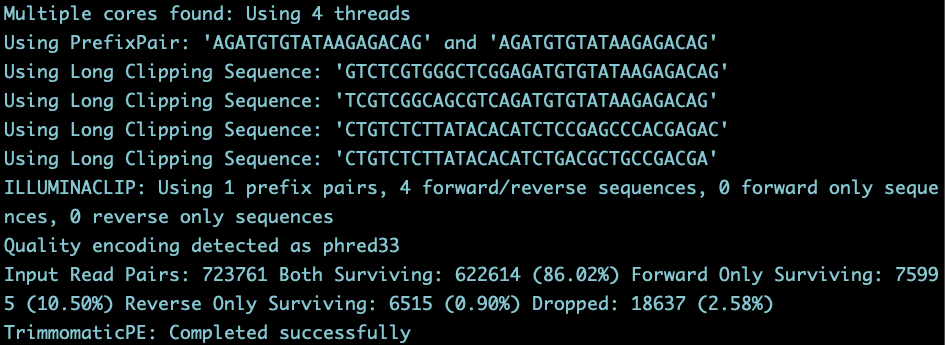

Here, we can see the proportion of reads remaining after trimming and filtering (86%) plus
the proportion dropped as a result (2.58%). The filtered and trimmed reads
( DRR107117_1.trimmed.fastq.gz and DRR107117_2.trimmed.fastq.gz ) will be in the
same folder and can be used for the downstream analysis steps.

## Exercise 2:

You can run fastqc on the filtered files ( DRR107117_1.trimmed.fastq.gz and
DRR107117_2.trimmed.fastq.gz ) and check how have the metrics improved by comparing
the reports before and after trimmomatic run.
